# Statistical mechanics of money
[A. A. Dragulescu and V. M. Yakovenko], ["Statistical mechanics of money" ](https://physics.umd.edu/~yakovenk/papers/EPJB-17-723-2000.pdf) [The European Physical Journal B, v. 17, pp. 723-729 (2000)](https://link.springer.com/article/10.1007/s100510070114), 2000


## Section 3: computer simulations

Simulates the stationary distribution of money from a system of random interactions were all agents start with the same amount money.
- The total number of agents is $N >> 1$
- The amount of money of agent $i$ is $m_i$
- The total amount of money in the system is $M = \sum_im_i$
- At $t=0$ all money is distributed equaly, $m_0 = M / N$
- Pairs of agents $m_i$ & $m_j$ is selected at each step and they exchange a quantity $\Delta m$. The direction of the interaction, i.e. who wins or looses money, is selected at random. Three exchange strategies (one simulation per strategy) are explored:
    - Exchange of random constant amount: $\Delta m = 1$
    - Exchange of random fraction $\nu$ of the average money of the **pair**: $\Delta m = \nu\cdot\dfrac{m_i+m_j}{2}$
    - Exchange or random fraction $\nu$ of the average money in the **system**: $\Delta m = \nu\cdot\dfrac{M}{N}$.
- Debt does not exist. This means that the transaction does not occur if an agent cannot fulfill the transaction in full.

Various runs of each simulation are evaluated and their histograms are either added or average to show a smooothed distribution. See [animations](https://physics.umd.edu/~yakovenk/econophysics/animation.html)

## helpers

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

class Simulation:
    def __init__(self, N: int, M: float):
        self.N = N
        self.M = M
        m_0 = M / N
        self.m = [m_0 for _ in range(N)]

    def run(self, total_steps: int, interaction_strategy: str):
        for step in range(total_steps):
            shuffled = list(range(self.N))
            random.shuffle(shuffled)
            for i, j in zip(shuffled[:self.N // 2], shuffled[self.N // 2:]):
                match interaction_strategy:
                    case "ConstantAmount":
                        delta_m = 1
                    case "RandomAmountFromAgents":
                        delta_m = random.random() * (self.m[i] + self.m[j]) / 2
                    case "RandomAmountFromSystem":
                        delta_m = random.random() * self.M / self.N
                    case _:
                        raise f"Not valid strategy: {interaction_strategy}"

                if self.m[i] >= delta_m:
                    self.m[i], self.m[j] = self.m[i] - delta_m, self.m[j] + delta_m

## simulations

### Case 1: Constant amount

In [23]:
N = 500
M = 5_000
t = 10_000
distributions = []
random.seed(3301)
for _ in tqdm(range(1000), desc="simulations"):
    sim = Simulation(N, M)
    sim.run(t, "ConstantAmount")
    histogram, _ = np.histogram(sim.m, bins=range(0, 101))
    distributions.append(histogram)

simulations:   0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
distribution = np.sum(distributions, axis=0)

In [29]:
T = M / N
exp_distribution = np.exp(-np.arange(100) / T) / T * M * 100

Text(0, 0.5, 'number of agents')

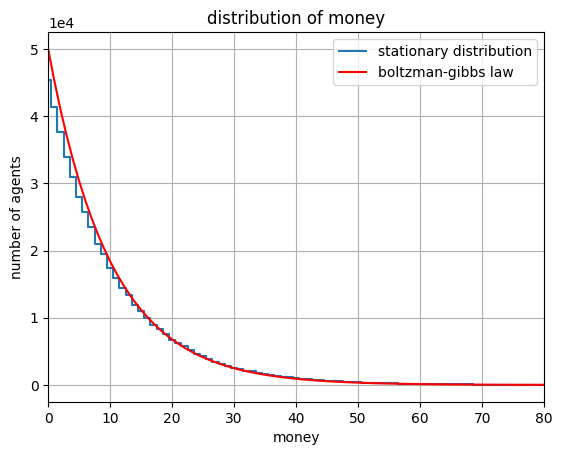

In [30]:
fig, ax = plt.subplots()
ax.plot(distribution, drawstyle="steps-mid", label="stationary distribution")
ax.plot(exp_distribution, 'r', label="boltzman-gibbs law")
ax.legend()
ax.grid()
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax.set_xlim((0, 80))
ax.set_title("distribution of money")
ax.set_xlabel("money")
ax.set_ylabel("number of agents")

### Case 2: Random fraction from average of pair

In [6]:
N = 5000
M = 5_000_000
t = 3_000
distributions = []
random.seed(3301)
for _ in tqdm(range(10), desc="simulations"):
    sim = Simulation(N, M)
    sim.run(t, "RandomAmountFromAgents")
    histogram, _ = np.histogram(sim.m, bins=range(0, 10_100, 100), density=True)
    distributions.append(histogram)

simulations:   0%|          | 0/10 [00:00<?, ?it/s]

In [7]:
distribution = np.mean(distributions, axis=0)

In [8]:
T = M / N
money = np.arange(0, 10_000, 100)
exp_distribution = np.exp(-money / T) / T

Text(0, 0.5, 'probability $P(m)$')

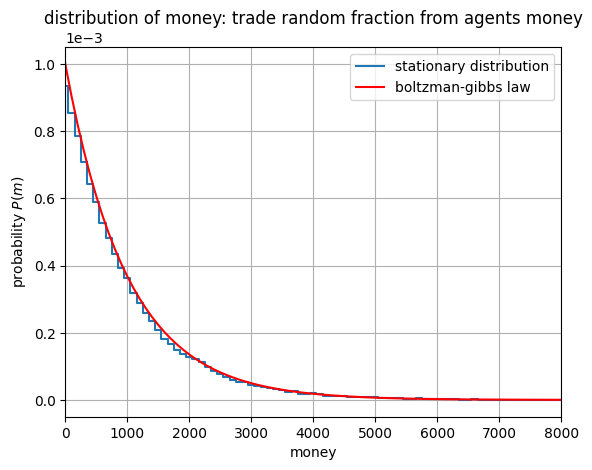

In [9]:
fig, ax = plt.subplots()
ax.plot(money, distribution, drawstyle="steps-mid", label="stationary distribution")
ax.plot(money, exp_distribution, 'r', label="boltzman-gibbs law")
ax.legend()
ax.grid()
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax.set_xlim((0, 8_000))
ax.set_title("distribution of money: trade random fraction from agents money")
ax.set_xlabel("money")
ax.set_ylabel("probability $P(m)$")

### Case 3: Random fraction from population average

In [10]:
N = 5000
M = 5_000_000
t = 3_000
distributions = []
random.seed(3301)
for _ in tqdm(range(10), desc="simulations"):
    sim = Simulation(N, M)
    sim.run(t, "RandomAmountFromSystem")
    histogram, _ = np.histogram(sim.m, bins=range(0, 10_100, 100), density=True)
    distributions.append(histogram)

simulations:   0%|          | 0/10 [00:00<?, ?it/s]

In [11]:
distribution = np.mean(distributions, axis=0)

In [12]:
T = M / N
money = np.arange(0, 10_000, 100)
exp_distribution = np.exp(-money / T) / T

Text(0, 0.5, 'probability $P(m)$')

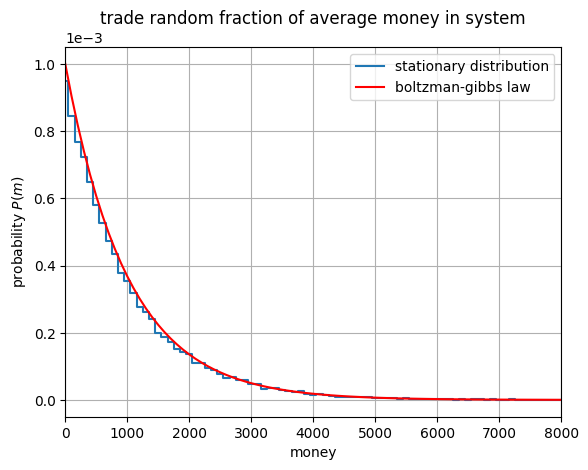

In [13]:
fig, ax = plt.subplots()
ax.plot(money, distribution, drawstyle="steps-mid", label="stationary distribution")
ax.plot(money, exp_distribution, 'r', label="boltzman-gibbs law")
ax.legend()
ax.grid()
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax.set_xlim((0, 8_000))
ax.set_title("trade random fraction of average money in system")
ax.set_xlabel("money")
ax.set_ylabel("probability $P(m)$")